# DATA SCIENCE CAPSTONE FINAL PROJECT WEEK 5.

#### Data_Source:

In [2]:
import pandas as pd
import requests

# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "71e6c206-96e1-48f1-8f6f-0e804687e3be"}
package = requests.get(url, params = params).json()
print(package["result"])

# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:

for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df = pd.DataFrame(data["result"]["records"])
        break
df

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'Transportation,Health', 'owner_email': 'Sandro.Tersigni@toronto.ca', 'excerpt': "Bike Parking location and asset type data maintained by the City of Toronto's Bike Parking Program.\r\n", 'private': False, 'owner_division': 'Transportation Services', 'num_tags': 6, 'id': '71e6c206-96e1-48f1-8f6f-0e804687e3be', 'metadata_created': '2019-07-23T18:01:58.028981', 'refresh_rate': 'Daily', 'title': 'Street Furniture - Bicycle Parking', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': 'http://gis.toronto.ca/arcgis/rest/services/primary/cot_geospatial2_mtm/MapServer/27', 'license_id': 'open-government-licence-toronto', 'type': 'dataset', 'resources': [{'cache_last_updated': None, 'package_id': '71e6c206-96e1-48f1-8f6f-0e804687e3be', 'datastore_active': True, 'id': 'e0700d94-0c4d-4058-9354-a4b397c0b249', 'size': None, 'format': 'Ge

,ADDRESSNUMBERTEXT,ADDRESSSTREET,ASSETTYPE,BIA,DIRECTION,FROMSTREET,FRONTINGSTREET,ID,LATITUDE,LONGITUDE,OBJECTID,SDE_STATE_ID,SIDE,SITEID,STATUS,WARD,X,Y,_id,geometry
0,70,The Pond Rd,Rack,None,None,Seneca Lane,None,BP-11699,43.770770,-79.499834,4,0,None,None,Existing,07,304813.343,4847867.805,5500530,"{""type"": ""Point"", ""coordinates"": [-79.49983426..."
1,8,Assiniboine Rd,Rack,None,None,Nelson Rd,None,BP-11900,43.768166,-79.504212,9,0,None,None,Existing,07,304460.910,4847578.496,5500531,"{""type"": ""Point"", ""coordinates"": [-79.50421178..."
2,8,Kensington Ave,Ring,Kensington Market,None,Kensington Ave,None,BP-03501,43.653058,-79.400127,66,0,None,None,Existing,11,312856.125,4834795.334,5500532,"{""type"": ""Point"", ""coordinates"": [-79.40012740..."
3,21,Canniff St,Ring,None,None,Strachan Ave,None,BP-12883,43.641451,-79.411493,109,0,None,None,Existing,10,311940.672,4833504.872,5500533,"{""type"": ""Point"", ""coordinates"": [-79.41149341..."
4,87,Avenue Rd,Ring,None,North,Elgin Ave,Avenue Rd,BP-15966,43.672000,-79.395336,178,0,East,None,Existing,11,313239.951,4836900.226,5500534,"{""type"": ""Point"", ""coordinates"": [-79.39533617..."
5,147,Baldwin St,None,Kensington Market,None,Spadina Ave,None,BP-13787,43.654888,-79.399866,197,0,None,None,Existing,11,312876.928,4834998.675,5500535,"{""type"": ""Point"", ""coordinates"": [-79.39986647..."
6,50,Blue Jays Way,Ring,Toronto Entertainment District,None,Mercer St,None,BP-03939,43.645318,-79.392120,208,0,None,None,Temporarily Removed,10,313503.184,4833936.254,5500536,"{""type"": ""Point"", ""coordinates"": [-79.39211960..."
7,1313,Bloor St W,Ring,Bloordale Village,None,St Helens Ave,None,BP-05924,43.657761,-79.443913,222,0,None,None,Temporarily Removed,09,309323.837,4835314.509,5500537,"{""type"": ""Point"", ""coordinates"": [-79.44391315..."
8,162,Mc Caul St,Ring,None,None,Mc Caul St,None,BP-07766,43.655628,-79.392068,283,0,None,None,Existing,11,313505.863,4835081.661,5500538,"{""type"": ""Point"", ""coordinates"": [-79.39206793..."
9,1246,Bloor St W,None,Bloordale Village,None,Margueretta St,None,BP-14494,43.658971,-79.440076,293,0,None,None,Existing,09,309633.259,4835449.198,5500539,"{""type"": ""Point"", ""coordinates"": [-79.44007572..."


## Processing and Cleaning of Data 

In [3]:
df.head()

,ADDRESSNUMBERTEXT,ADDRESSSTREET,ASSETTYPE,BIA,DIRECTION,FROMSTREET,FRONTINGSTREET,ID,LATITUDE,LONGITUDE,OBJECTID,SDE_STATE_ID,SIDE,SITEID,STATUS,WARD,X,Y,_id,geometry
0,70,The Pond Rd,Rack,None,None,Seneca Lane,None,BP-11699,43.770770,-79.499834,4,0,None,None,Existing,07,304813.343,4847867.805,5500530,"{""type"": ""Point"", ""coordinates"": [-79.49983426..."
1,8,Assiniboine Rd,Rack,None,None,Nelson Rd,None,BP-11900,43.768166,-79.504212,9,0,None,None,Existing,07,304460.910,4847578.496,5500531,"{""type"": ""Point"", ""coordinates"": [-79.50421178..."
2,8,Kensington Ave,Ring,Kensington Market,None,Kensington Ave,None,BP-03501,43.653058,-79.400127,66,0,None,None,Existing,11,312856.125,4834795.334,5500532,"{""type"": ""Point"", ""coordinates"": [-79.40012740..."
3,21,Canniff St,Ring,None,None,Strachan Ave,None,BP-12883,43.641451,-79.411493,109,0,None,None,Existing,10,311940.672,4833504.872,5500533,"{""type"": ""Point"", ""coordinates"": [-79.41149341..."
4,87,Avenue Rd,Ring,None,North,Elgin Ave,Avenue Rd,BP-15966,43.672000,-79.395336,178,0,East,None,Existing,11,313239.951,4836900.226,5500534,"{""type"": ""Point"", ""coordinates"": [-79.39533617..."


In [4]:
df_1 = df[['_id','X','Y','ADDRESSSTREET','LONGITUDE','LATITUDE']]
print(df_1)

        _id           X            Y       ADDRESSSTREET  LONGITUDE   LATITUDE
0   5500530  304813.343  4847867.805         The Pond Rd -79.499834  43.770770
1   5500531  304460.910  4847578.496      Assiniboine Rd -79.504212  43.768166
2   5500532  312856.125  4834795.334      Kensington Ave -79.400127  43.653058
3   5500533  311940.672  4833504.872          Canniff St -79.411493  43.641451
4   5500534  313239.951  4836900.226           Avenue Rd -79.395336  43.672000
5   5500535  312876.928  4834998.675          Baldwin St -79.399866  43.654888
6   5500536  313503.184  4833936.254       Blue Jays Way -79.392120  43.645318
7   5500537  309323.837  4835314.509          Bloor St W -79.443913  43.657761
8   5500538  313505.863  4835081.661          Mc Caul St -79.392068  43.655628
9   5500539  309633.259  4835449.198          Bloor St W -79.440076  43.658971
10  5500540  310973.155  4837275.766        Davenport Rd -79.423442  43.675403
11  5500541  314695.814  4834615.514          Lombar

In [5]:
df_1.describe()

,_id,X,Y,LONGITUDE,LATITUDE
count,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000
mean,5.500580e+06,312423.907040,4.836119e+06,-79.405471,43.664970
std,2.901149e+01,2728.692846,3.118785e+03,0.033831,0.028078
min,5.500530e+06,304032.946000,4.831217e+06,-79.509508,43.620890
25%,5.500555e+06,311115.279250,4.834340e+06,-79.421696,43.648950
50%,5.500580e+06,312970.548500,4.834926e+06,-79.398617,43.654262
75%,5.500604e+06,313852.778500,4.836682e+06,-79.387742,43.670033
max,5.500629e+06,317989.597000,4.847868e+06,-79.336464,43.770770


In [6]:
df_1.iloc[:10]

,_id,X,Y,ADDRESSSTREET,LONGITUDE,LATITUDE
0,5500530,304813.343,4847867.805,The Pond Rd,-79.499834,43.770770
1,5500531,304460.910,4847578.496,Assiniboine Rd,-79.504212,43.768166
2,5500532,312856.125,4834795.334,Kensington Ave,-79.400127,43.653058
3,5500533,311940.672,4833504.872,Canniff St,-79.411493,43.641451
4,5500534,313239.951,4836900.226,Avenue Rd,-79.395336,43.672000
5,5500535,312876.928,4834998.675,Baldwin St,-79.399866,43.654888
6,5500536,313503.184,4833936.254,Blue Jays Way,-79.392120,43.645318
7,5500537,309323.837,4835314.509,Bloor St W,-79.443913,43.657761
8,5500538,313505.863,4835081.661,Mc Caul St,-79.392068,43.655628
9,5500539,309633.259,4835449.198,Bloor St W,-79.440076,43.658971


In [7]:
df_2 =df_1[['X','Y']]
#df_2 = dataframe(Data,columns=['x','y'])
print(df_2)

             X            Y
0   304813.343  4847867.805
1   304460.910  4847578.496
2   312856.125  4834795.334
3   311940.672  4833504.872
4   313239.951  4836900.226
5   312876.928  4834998.675
6   313503.184  4833936.254
7   309323.837  4835314.509
8   313505.863  4835081.661
9   309633.259  4835449.198
10  310973.155  4837275.766
11  314695.814  4834615.514
12  313809.734  4837004.765
13  311736.367  4833336.570
14  315707.043  4834678.549
15  313762.070  4836651.849
16  310678.728  4835153.174
17  313582.386  4840915.299
18  312660.375  4833952.309
19  313270.708  4837798.779
20  314682.936  4834690.252
21  313981.912  4835276.292
22  309638.509  4833339.522
23  314276.222  4836170.871
24  312471.955  4836619.942
25  314702.293  4834372.234
26  306782.950  4834648.378
27  312872.240  4833824.959
28  312658.225  4842850.387
29  313035.623  4835389.384
..         ...          ...
70  312672.442  4842775.492
71  312672.897  4842772.978
72  312970.850  4840841.388
73  312967.879  4840

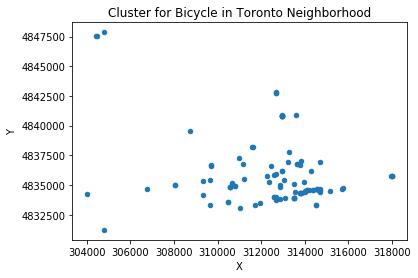

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_2 = pd.DataFrame(data, columns=['x', 'y'])
df.plot.scatter(x='X',y='Y',title = 'Cluster for Bicycle in Toronto Neighborhood')

In [10]:
!pip install -U scikit-learn

     |████████████████████████████████| 6.9MB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 307kB 25.9MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.1 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


## Installation of Folium to aid Map Interpretation.

In [11]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')
from sklearn.cluster import KMeans
import folium
print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [13]:
latitude = 43.653058
longitude = -79.400127

In [14]:
# define the world map
Toronto_map = folium.Map(location = [latitude,longitude], zoom_start =15)

# display world map
Toronto_map

In [15]:
# importing old libraries (also used in the two first parts)
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup as bs

In [16]:
# importing new libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Generating maps from processed data.

In [17]:
# geocode address and place marker on map

# map
Toronto_map = folium.Map(location=[43.653058, -79.400127], zoom_start=12)

# get location information for address
#address = geocoder.osm('Kensington Ave')

# address latitude and longitude
address_latlng = [43.65305, -79.400127]

# add marker to map
folium.Marker(location=[43.65305, -79.400127], popup='Kensington Ave').add_to(Toronto_map)

# display map
Toronto_map

In [19]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
Toronto_map = folium.Map(location=[43.653058, -79.400127], zoom_start=12)

# plot Neighborhood locations
for (index, row) in df.iterrows():
    folium.Marker(location=[row.loc['LATITUDE'], row.loc['LONGITUDE']], 
                  popup=row.loc['ADDRESSSTREET']).add_to(Toronto_map)
    
    Toronto_map.save('Toronto_map.html')
# display map    
Toronto_map

### Saving Map for Display.

In [21]:
Toronto_map = folium.Map(location=[43.653058, -79.400127], zoom_start=12)
# put in path.html
Toronto_map.save('index.html')
#Toronto_map.save('\Users\GEORGE\Desktop\Toronto_map\index.html')

In [22]:
# Below are the List of locations dedicated to Bicycle route with the Toronto
df_3 = df[['ADDRESSSTREET','LONGITUDE','LATITUDE']]
print(df_3)

         ADDRESSSTREET  LONGITUDE   LATITUDE
0          The Pond Rd -79.499834  43.770770
1       Assiniboine Rd -79.504212  43.768166
2       Kensington Ave -79.400127  43.653058
3           Canniff St -79.411493  43.641451
4            Avenue Rd -79.395336  43.672000
5           Baldwin St -79.399866  43.654888
6        Blue Jays Way -79.392120  43.645318
7           Bloor St W -79.443913  43.657761
8           Mc Caul St -79.392068  43.655628
9           Bloor St W -79.440076  43.658971
10        Davenport Rd -79.423442  43.675403
11          Lombard St -79.377324  43.651417
12            Yonge St -79.388269  43.672935
13  Western Battery Rd -79.414028  43.639938
14           King St E -79.364787  43.651970
15          Bloor St W -79.388866  43.669758
16           Dewson St -79.427117  43.656299
17   Mount Pleasant Rd -79.391024  43.708137
18         Bathurst St -79.402566  43.645471
19       Cottingham St -79.394941  43.680088
20         Victoria St -79.377482  43.652090
21        

### Here is my outcome and Thanks folks ....
### from : George Osagie Irumudomo.

### Contact: osaxx1@hotmail.com